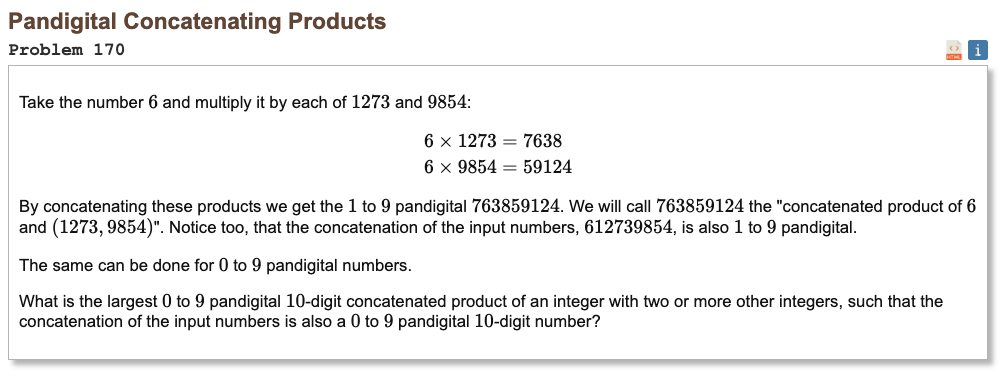

## Initial approach

* find a 10-digit 0-9 pandigital made by joining n×1, n×2, … with at least two multipliers
* the input digits (n and multipliers) must also form a 10-digit pandigital
* build inputs without repeated digits or leading zeros
* test all valid splits into n and multipliers
* check if the concatenated products are pandigital
* search in descending order to get the largest result fast
* use simple backtracking, no extra libraries

In [1]:
def is_pandigital_0_9(s):
    return len(s) == 10 and set(s) == set("0123456789")

def concat_product(n, mults):
    return "".join(str(n * m) for m in mults)

def to_int(s):
    if s[0] == "0":
        return None
    return int(s)

def split_by_lengths(s, lengths):
    i = 0
    out = []
    for L in lengths:
        out.append(s[i:i+L])
        i += L
    return out

def compositions(total, parts, min_len=1):
    if parts == 1:
        if total >= min_len:
            yield (total,)
        return
    for first in range(min_len, total - min_len * (parts - 1) + 1):
        for rest in compositions(total - first, parts - 1, min_len):
            yield (first,) + rest

def gen_inputs_desc():
    digits = "9876543210"
    used = [False] * 10
    cur = []
    def dfs():
        if len(cur) == 10:
            yield "".join(cur)
            return
        for ch in digits:
            idx = ord(ch) - 48
            if not used[idx]:
                used[idx] = True
                cur.append(ch)
                yield from dfs()
                cur.pop()
                used[idx] = False
    yield from dfs()

def solve():
    best = ""
    best_info = None
    for s_in in gen_inputs_desc():
        if s_in[0] == "0":
            continue
        for parts in range(3, 6):
            for lens in compositions(10, parts, 1):
                n_str, *a_strs = split_by_lengths(s_in, lens)
                n = to_int(n_str)
                if n is None:
                    continue
                mults = []
                ok = True
                for t in a_strs:
                    if t[0] == "0":
                        ok = False
                        break
                    mults.append(int(t))
                if not ok:
                    continue
                if len(mults) < 2:
                    continue
                s_out = concat_product(n, mults)
                if is_pandigital_0_9(s_out):
                    if s_out > best:
                        best = s_out
                        best_info = (n, tuple(mults), s_in, s_out)
                        return best_info
    return best_info

ans = solve()
result = ans[3] if ans else None
print("Result:", result)

Result: 7861059234
